In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings

warnings.filterwarnings("ignore")
sb.set(rc={'figure.figsize':(12,9)})


# Importing data

In [2]:
tweet = pd.read_csv('Information.csv', engine = 'python')

In [3]:
tweet

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,‰ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/15 13:20,6.587400e+17,Verona ‰ªÁ,NaN
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",NaN
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,NaN
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,...,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,NaN


In [4]:
tweet.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

## Formatting columns names

In [5]:
tweet.columns = tweet.columns.str.strip().str.replace('_', ' ')
tweet.columns

Index([' unit id', ' golden', ' unit state', ' trusted judgments',
       ' last judgment at', 'gender', 'gender:confidence', 'profile yn',
       'profile yn:confidence', 'created', 'description', 'fav number',
       'gender gold', 'link color', 'name', 'profile yn gold', 'profileimage',
       'retweet count', 'sidebar color', 'text', 'tweet coord', 'tweet count',
       'tweet created', 'tweet id', 'tweet location', 'user timezone'],
      dtype='object')

In [6]:
tweet.columns = tweet.columns.str.strip().str.replace(' ', '_')
tweet.columns

Index(['unit_id', 'golden', 'unit_state', 'trusted_judgments',
       'last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

## We can observe nans in this dataset. These observations will be dropped.

In [7]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_id                20050 non-null  int64  
 1   golden                 20050 non-null  bool   
 2   unit_state             20050 non-null  object 
 3   trusted_judgments      20050 non-null  int64  
 4   last_judgment_at       20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [8]:
tweet.isnull().sum()

unit_id                      0
golden                       0
unit_state                   0
trusted_judgments            0
last_judgment_at            50
gender                      97
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               3744
fav_number                   0
gender_gold              20000
link_color                   0
name                         0
profile_yn_gold          20000
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              19891
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            7484
user_timezone             7798
dtype: int64

In [9]:
tweet.columns

Index(['unit_id', 'golden', 'unit_state', 'trusted_judgments',
       'last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

## Dropping the unwanted columns containing null values, keep the necessary columns.

In [10]:
tweet = tweet.drop(columns = ['gender_gold','profile_yn_gold','tweet_coord','user_timezone','last_judgment_at',
                              'unit_state','profile_yn','profile_yn:confidence','trusted_judgments','profileimage',
                              'tweet_location','tweet_created','tweet_id'])

In [11]:
tweet.isnull().sum()

unit_id                 0
golden                  0
gender                 97
gender:confidence      26
created                 0
description          3744
fav_number              0
link_color              0
name                    0
retweet_count           0
sidebar_color           0
text                    0
tweet_count             0
dtype: int64

In [12]:
tweet.dropna(inplace=True)

In [13]:
tweet

,unit_id,golden,gender,gender:confidence,created,description,fav_number,link_color,name,retweet_count,sidebar_color,text,tweet_count
0,815719226,False,male,1.0000,12/5/13 1:48,i sing my own rhythm.,0,08C2C2,sheezy0,0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964
1,815719227,False,male,1.0000,10/1/12 13:51,I'm the author of novels filled with family dr...,68,0084B4,DavdBurnett,0,C0DEED,‰ÛÏIt felt like they were my friends and I was...,7471
2,815719228,False,male,0.6625,11/28/14 11:30,louis whining and squealing and all,7696,ABB8C2,lwtprettylaugh,1,C0DEED,i absolutely adore when louis starts the songs...,5617
3,815719229,False,male,1.0000,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0084B4,douggarland,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693
4,815719230,False,female,1.0000,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,3B94D9,WilfordGemma,0,0,Watching Neighbours on Sky+ catching up with t...,31462
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,female,1.0000,8/5/15 21:16,(rp),302,0084B4,capuletrosa,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",783
20046,815757681,True,male,1.0000,8/15/12 21:17,"Whatever you like, it's not a problem at all. ...",2513,CFB929,BenNight41,0,0,Greg Hardy you a good player and all but don't...,13523
20047,815757830,True,male,1.0000,9/3/12 1:17,#TeamBarcelona ..You look lost so you should f...,50,0084B4,realuzzyfluxz,0,C0DEED,You can miss people and still never want to se...,26419
20048,815757921,True,female,0.8489,11/6/12 23:46,Anti-statist; I homeschool my kids. Aspiring t...,70804,9266CC,argumatronic,0,0,@bitemyapp i had noticed your tendency to pee ...,56073


In [14]:
tweet.duplicated().sum()

0

In [15]:
tweet['gender'].unique()

array(['male', 'female', 'brand', 'unknown'], dtype=object)

# Removing entries whose gender are unknown

In [16]:
tweet = tweet[tweet['gender'] != 'unknown']
tweet = tweet[tweet['gender:confidence'] == 1]
tweet.shape

(11773, 13)

## No need of gender:confidence column 

In [17]:
tweet = tweet.drop('gender:confidence', axis = 1)

In [18]:
tweet

,unit_id,golden,gender,created,description,fav_number,link_color,name,retweet_count,sidebar_color,text,tweet_count
0,815719226,False,male,12/5/13 1:48,i sing my own rhythm.,0,08C2C2,sheezy0,0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964
1,815719227,False,male,10/1/12 13:51,I'm the author of novels filled with family dr...,68,0084B4,DavdBurnett,0,C0DEED,‰ÛÏIt felt like they were my friends and I was...,7471
3,815719229,False,male,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0084B4,douggarland,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693
4,815719230,False,female,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,3B94D9,WilfordGemma,0,0,Watching Neighbours on Sky+ catching up with t...,31462
5,815719231,False,female,3/11/10 18:14,you don't know me.,3901,F5ABB5,monroevicious,0,0,"Ive seen people on the train with lamps, chair...",20036
...,...,...,...,...,...,...,...,...,...,...,...,...
20044,815756767,True,female,6/11/14 1:55,I Love Me...Myself....&....I,632,0084B4,Bigbootyyjudy_,0,C0DEED,Need A Ride Home From Practice _Ù÷Ô_Ù÷Ô_Ù÷ÔAnd...,6669
20045,815757572,True,female,8/5/15 21:16,(rp),302,0084B4,capuletrosa,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",783
20046,815757681,True,male,8/15/12 21:17,"Whatever you like, it's not a problem at all. ...",2513,CFB929,BenNight41,0,0,Greg Hardy you a good player and all but don't...,13523
20047,815757830,True,male,9/3/12 1:17,#TeamBarcelona ..You look lost so you should f...,50,0084B4,realuzzyfluxz,0,C0DEED,You can miss people and still never want to se...,26419


## Ques. Tweet with highest re_tweet count.


In [19]:
re_tweet = tweet['retweet_count'].max()
highest_re_tweet = tweet[tweet['retweet_count']==re_tweet]
highest_re_tweet

,unit_id,golden,gender,created,description,fav_number,link_color,name,retweet_count,sidebar_color,text,tweet_count
8810,815728145,False,male,10/12/09 5:03,Part time rapper. Full time vlogger & kale kin...,13740,9999,MarcusButler,153,FFFFFF,ladies and gentlemen meet your new prime minis...,14085


 The user with the highest re-tweet count was <b>MarcusButler</b>, a male candidate with a score of 153. 	 

## Ques. Tweet with highest tweet count.


In [20]:
_tweet = tweet['tweet_count'].max()
highest_tweet = tweet[tweet['tweet_count']==_tweet]
highest_tweet

,unit_id,golden,gender,created,description,fav_number,link_color,name,retweet_count,sidebar_color,text,tweet_count
15940,815735441,False,male,2/21/12 18:17,Confira as ultimas notÌ_cias do que estÌÁ acon...,81372,FFCC4D,gabrieldsmqs,0,0,One State‰Ûªs Struggle to Make Ends Meet: Why ...,2680199


The user with the highest tweet count was <b>Mr. Gabriel dsmqs</b>, a male candidate with a score of 2680199. 

## Bar Plot for Gender Column.

<AxesSubplot:>

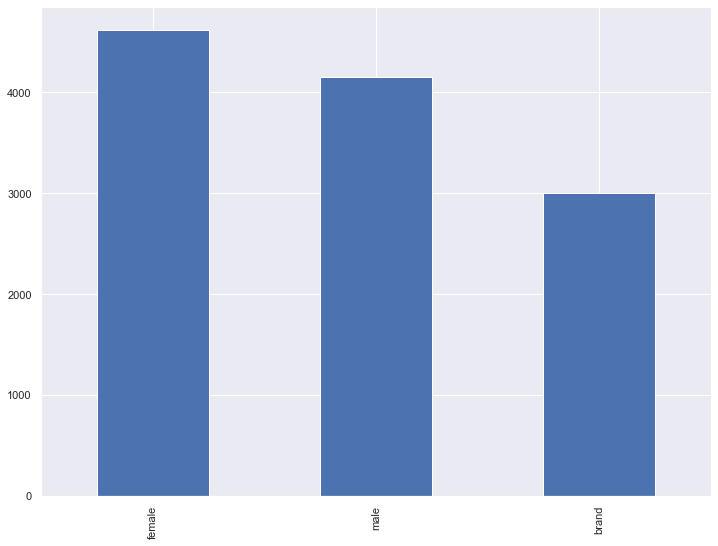

In [21]:
tweet.gender.value_counts().plot(kind="bar")

## Ques. No. of users that were considered in golden standard.

In [23]:
no_of_golden = tweet[tweet['golden'] == True]
len(no_of_golden)

27

## No. of golden users per gender.

Text(0.5, 0.98, 'Percentage of golden users per gender')

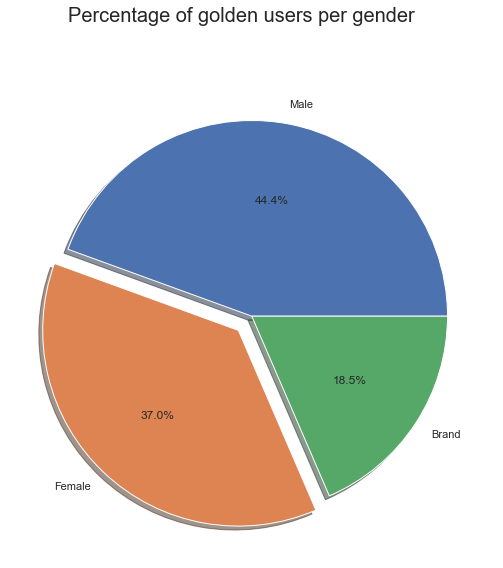

In [24]:
no_of_male = no_of_golden[no_of_golden['gender'] == 'male']
m = len(no_of_male)

no_of_female = no_of_golden[no_of_golden['gender'] == 'female']
f = len(no_of_female)

no_of_brand = no_of_golden[no_of_golden['gender'] == 'brand']
b = len(no_of_golden) - m - f

explode = (0,0.1,0)

sizes = [m, f, b]

labels = ['Male', 'Female', 'Brand']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, shadow = True)
plt.suptitle("Percentage of golden users per gender", fontsize=20)


## Ques. What are the most common emotions/words used by Males and Females?

Extracting words one by one 

First Male words

In [25]:
import nltk

In [26]:
columns = ['description', 'text']
for i in columns:
    tweet[i] = tweet[i].astype(str)
tweet

,unit_id,golden,gender,created,description,fav_number,link_color,name,retweet_count,sidebar_color,text,tweet_count
0,815719226,False,male,12/5/13 1:48,i sing my own rhythm.,0,08C2C2,sheezy0,0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964
1,815719227,False,male,10/1/12 13:51,I'm the author of novels filled with family dr...,68,0084B4,DavdBurnett,0,C0DEED,‰ÛÏIt felt like they were my friends and I was...,7471
3,815719229,False,male,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0084B4,douggarland,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693
4,815719230,False,female,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,3B94D9,WilfordGemma,0,0,Watching Neighbours on Sky+ catching up with t...,31462
5,815719231,False,female,3/11/10 18:14,you don't know me.,3901,F5ABB5,monroevicious,0,0,"Ive seen people on the train with lamps, chair...",20036
...,...,...,...,...,...,...,...,...,...,...,...,...
20044,815756767,True,female,6/11/14 1:55,I Love Me...Myself....&....I,632,0084B4,Bigbootyyjudy_,0,C0DEED,Need A Ride Home From Practice _Ù÷Ô_Ù÷Ô_Ù÷ÔAnd...,6669
20045,815757572,True,female,8/5/15 21:16,(rp),302,0084B4,capuletrosa,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",783
20046,815757681,True,male,8/15/12 21:17,"Whatever you like, it's not a problem at all. ...",2513,CFB929,BenNight41,0,0,Greg Hardy you a good player and all but don't...,13523
20047,815757830,True,male,9/3/12 1:17,#TeamBarcelona ..You look lost so you should f...,50,0084B4,realuzzyfluxz,0,C0DEED,You can miss people and still never want to se...,26419


## Clearing the text first

In [27]:
import re
def cleaning(st):
    st = re.sub('\s\W',' ',st)
    st = re.sub('\W,\s',' ',st)
    st = re.sub(r'[^\w]',' ', st)
    st = re.sub("\d+","", st)
    st = re.sub('\s+',' ',st)
    st = re.sub('[!@#$_]','', st)
    st = st.replace("co","")
    st = st.replace("https","")
    st = st.replace(",","")
    st = st.replace("[\w*"," ")
    return st
tweet.text = [cleaning(s) for s in tweet.text]  
tweet.description = [cleaning(s) for s in tweet.description]


## Stemming

In [28]:
from nltk.stem import PorterStemmer

In [29]:
stem = PorterStemmer()

In [30]:
for i in ['description' , 'text']:
    tweet[i] = tweet[i].apply(lambda x: " ".join([stem.stem(word) for word in x.split()]))

## lemmatization

In [31]:
from nltk.stem import WordNetLemmatizerC

In [32]:
lm = WordNetLemmatizer()

In [33]:
for i in ['description' , 'text']:
    tweet[i] = tweet[i].apply(lambda x: " ".join([lm.lemmatize(word) for word in x.split()]))
    

First Male

In [34]:
male = tweet[tweet['gender']=='male']
female =tweet[tweet['gender']=='female']

male

,unit_id,golden,gender,created,description,fav_number,link_color,name,retweet_count,sidebar_color,text,tweet_count
0,815719226,False,male,12/5/13 1:48,i sing my own rhythm,0,08C2C2,sheezy0,0,FFFFFF,robbi E respond To critic after win against ed...,110964
1,815719227,False,male,10/1/12 13:51,I m the author of novel fill with famili drama...,68,0084B4,DavdBurnett,0,C0DEED,ûïit felt like they were my friend and I wa li...,7471
3,815719229,False,male,6/11/09 22:39,mobil guy er shazam googl kleiner perkin yahoo...,202,0084B4,douggarland,0,C0DEED,Hi jordanspieth look at the url do you use ift...,1693
7,815719233,False,male,12/3/12 21:54,the secret of get ahead is get start,80,0000FF,RobinMeske,0,C0DEED,gala bingo club bought for å m the UK s larges...,112117
17,815719243,False,male,10/18/09 11:41,over enthusiast F fan model llector music fan ...,5,0084B4,SSmyth2010,0,C0DEED,olyazzi ditto I m still learn the favourit and...,91
...,...,...,...,...,...,...,...,...,...,...,...,...
20032,815755689,True,male,5/15/09 20:04,amic IT person self indulg writer somehow lice...,2651,0084B4,FauxBen,0,C0DEED,legobutt you can do quest and kill stuff while...,14165
20037,815756103,True,male,11/27/07 13:10,typograph and typograph nsultant founder of fo...,1762,990000,NickSherman,0,FFFFFF,trentwalton oguzbilg spell it out in all cap a...,9092
20043,815756700,True,male,9/27/11 0:19,head chef chez bruce love car and bicycl food,3879,0099B9,MattChristmas1,1,5ED4DC,game faggot and venison loin crisp spelt and q...,8193
20046,815757681,True,male,8/15/12 21:17,whatev you like it s not a problem at all char...,2513,CFB929,BenNight41,0,0,greg hardi you a good player and all but don t...,13523


In [35]:
male_sent = []
for i in male.text:
    male_sent.append(i)

In [36]:
from nltk.tokenize import word_tokenize

In [37]:
tokenized_words_male = word_tokenize(str(male_sent))

In [38]:
tokenized_words_male

['[',
 "'robbi",
 'E',
 'respond',
 'To',
 'critic',
 'after',
 'win',
 'against',
 'eddi',
 'edward',
 'In',
 'the',
 'worldtitleseri',
 't',
 'nsybbmvjkz',
 "'",
 ',',
 "'ûïit",
 'felt',
 'like',
 'they',
 'were',
 'my',
 'friend',
 'and',
 'I',
 'wa',
 'live',
 'the',
 'stori',
 'with',
 'them',
 'Û',
 't',
 'arngeyhno',
 'retir',
 'ian',
 't',
 'cizcanpqfz',
 "'",
 ',',
 "'Hi",
 'jordanspieth',
 'look',
 'at',
 'the',
 'url',
 'do',
 'you',
 'use',
 'ifttt',
 'don',
 't',
 'typic',
 'see',
 'an',
 'advanc',
 'user',
 'on',
 'the',
 'pgatour',
 't',
 'houpel',
 "'",
 ',',
 "'gala",
 'bingo',
 'club',
 'bought',
 'for',
 'å',
 'm',
 'the',
 'UK',
 's',
 'largest',
 'high',
 'street',
 'bingo',
 'oper',
 'gala',
 'is',
 'be',
 'taken',
 'over',
 'by',
 'Û',
 't',
 'hzeeykjud',
 "'",
 ',',
 "'olyazzi",
 'ditto',
 'I',
 'm',
 'still',
 'learn',
 'the',
 'favourit',
 'and',
 'retweet',
 'stuff',
 'least',
 'it',
 'suck',
 'le',
 'than',
 'facebook',
 'haha',
 'P',
 "'",
 ',',
 "'yall",
 

In [39]:
from nltk.corpus import stopwords

In [40]:
stopwords_list_male = stopwords.words('English')

In [41]:
clean_male_words = []
for words in tokenized_words_male:
    if words not in stopwords_list_male:
        clean_male_words.append(words)

In [42]:
len(tokenized_words_male), len(clean_male_words)

(79482, 51834)

In [43]:
clean_male_words

['[',
 "'robbi",
 'E',
 'respond',
 'To',
 'critic',
 'win',
 'eddi',
 'edward',
 'In',
 'worldtitleseri',
 'nsybbmvjkz',
 "'",
 ',',
 "'ûïit",
 'felt',
 'like',
 'friend',
 'I',
 'wa',
 'live',
 'stori',
 'Û',
 'arngeyhno',
 'retir',
 'ian',
 'cizcanpqfz',
 "'",
 ',',
 "'Hi",
 'jordanspieth',
 'look',
 'url',
 'use',
 'ifttt',
 'typic',
 'see',
 'advanc',
 'user',
 'pgatour',
 'houpel',
 "'",
 ',',
 "'gala",
 'bingo',
 'club',
 'bought',
 'å',
 'UK',
 'largest',
 'high',
 'street',
 'bingo',
 'oper',
 'gala',
 'taken',
 'Û',
 'hzeeykjud',
 "'",
 ',',
 "'olyazzi",
 'ditto',
 'I',
 'still',
 'learn',
 'favourit',
 'retweet',
 'stuff',
 'least',
 'suck',
 'le',
 'facebook',
 'haha',
 'P',
 "'",
 ',',
 "'yall",
 'lmfaoo',
 'right',
 'choru',
 'came',
 'ON',
 'A',
 'tear',
 'roll',
 'hi',
 'face',
 'ayuqdptvs',
 "'",
 ',',
 "'jame",
 'bond',
 'premier',
 'night',
 'everymancinema',
 'oxt',
 'sidiedey',
 'let',
 'hope',
 'live',
 'expect',
 'spectr',
 "'",
 ',',
 "'all",
 'magic',
 'hath',


In [44]:
cleaned_male_words = []
for i in clean_male_words:
    for j in i:
        if (j >= 'a' and j <= 'z') or (j >= 'A' and j <= 'Z'):
            cleaned_male_words.append(i)

In [45]:
male_words_list =  list(set(cleaned_male_words))

Second Female words

In [46]:
female_sent = []
for i in female.text:
    female_sent.append(i)

In [47]:
tokenized_words_female = word_tokenize(str(female_sent))

In [48]:
stopwords_list_female = stopwords.words('English')

In [49]:
clean_female_words = []
for words in tokenized_words_female:
    if words not in stopwords_list_female:
        clean_female_words.append(words)

In [50]:
clean_female_words

['[',
 "'watch",
 'neighbour',
 'ski',
 'catch',
 'neighb',
 'xxx',
 'Ù',
 'ÄÙ',
 'ÄÙ',
 'äùôîù',
 'èùô',
 'Ù',
 'È',
 'xxx',
 "'",
 ',',
 "'ive",
 'seen',
 'peopl',
 'train',
 'lamp',
 'chair',
 'tv',
 'etc',
 'wzfpvmi',
 "'",
 ',',
 "'aphmau",
 'pic',
 'defin',
 'mcd',
 'fangirl',
 'fanboy',
 'mcd',
 'shipper',
 'xD',
 "'",
 ',',
 "'evieladi",
 'love',
 'tree',
 'thi',
 'year',
 'never',
 'seen',
 'gorgeou',
 'thi',
 'autumn',
 'lour',
 "'",
 ',',
 "'giannaaa",
 'lmao',
 'Ù',
 'âÙ',
 'â',
 'dude',
 'I',
 'hella',
 'scare',
 'next',
 'episod',
 'bc',
 'end',
 'yesterday',
 "'",
 ',',
 "'craftyear",
 'isabelpascu',
 'thank',
 'retweet',
 "'",
 ',',
 "'all",
 'girl',
 'went',
 'sleep',
 'guy',
 'sat',
 'floor',
 'watch',
 'usù',
 'âÙ',
 'â',
 "'",
 ',',
 "'chrisaoffici",
 'I',
 'right',
 'sideù',
 'â',
 'ïîù',
 'ü',
 'xxx',
 "'",
 ',',
 "'sydniejr",
 'except',
 'onc',
 'hallmark',
 'movi',
 'start',
 'I',
 'get',
 'anyth',
 'done',
 'Ù',
 'Ù',
 'Ùã',
 "'",
 ',',
 "'you",
 'leav',
 'grou

In [51]:
cleaned_female_words = []
for i in clean_female_words:
    for j in i:
        if (j >= 'a' and j <= 'z') or (j >= 'A' and j <= 'Z'):
            cleaned_female_words.append(i)

In [52]:
cleaned_female_words

["'watch",
 "'watch",
 "'watch",
 "'watch",
 "'watch",
 'neighbour',
 'neighbour',
 'neighbour',
 'neighbour',
 'neighbour',
 'neighbour',
 'neighbour',
 'neighbour',
 'neighbour',
 'ski',
 'ski',
 'ski',
 'catch',
 'catch',
 'catch',
 'catch',
 'catch',
 'neighb',
 'neighb',
 'neighb',
 'neighb',
 'neighb',
 'neighb',
 'xxx',
 'xxx',
 'xxx',
 'xxx',
 'xxx',
 'xxx',
 "'ive",
 "'ive",
 "'ive",
 'seen',
 'seen',
 'seen',
 'seen',
 'peopl',
 'peopl',
 'peopl',
 'peopl',
 'peopl',
 'train',
 'train',
 'train',
 'train',
 'train',
 'lamp',
 'lamp',
 'lamp',
 'lamp',
 'chair',
 'chair',
 'chair',
 'chair',
 'chair',
 'tv',
 'tv',
 'etc',
 'etc',
 'etc',
 'wzfpvmi',
 'wzfpvmi',
 'wzfpvmi',
 'wzfpvmi',
 'wzfpvmi',
 'wzfpvmi',
 'wzfpvmi',
 "'aphmau",
 "'aphmau",
 "'aphmau",
 "'aphmau",
 "'aphmau",
 "'aphmau",
 'pic',
 'pic',
 'pic',
 'defin',
 'defin',
 'defin',
 'defin',
 'defin',
 'mcd',
 'mcd',
 'mcd',
 'fangirl',
 'fangirl',
 'fangirl',
 'fangirl',
 'fangirl',
 'fangirl',
 'fangirl',
 'fanb

In [53]:
female_words_list =  list(set(cleaned_female_words))

Answer :-

In [54]:
most_common_words = list(set(male_words_list).intersection(set(female_words_list)))

In [55]:
most_common_words[:20]

["'god",
 'denni',
 'inspir',
 'florida',
 'sunday',
 'promo',
 'towel',
 'republ',
 'poor',
 'respond',
 'accent',
 'club',
 'six',
 "'think",
 'offer',
 'classic',
 'knew',
 'genuin',
 'measur',
 'hous']

,Word,Count
22,I,3123
110,thi,816
216,get,736
23,wa,651
16,like,648
124,one,500
108,love,465
404,go,441
316,day,424
297,new,422


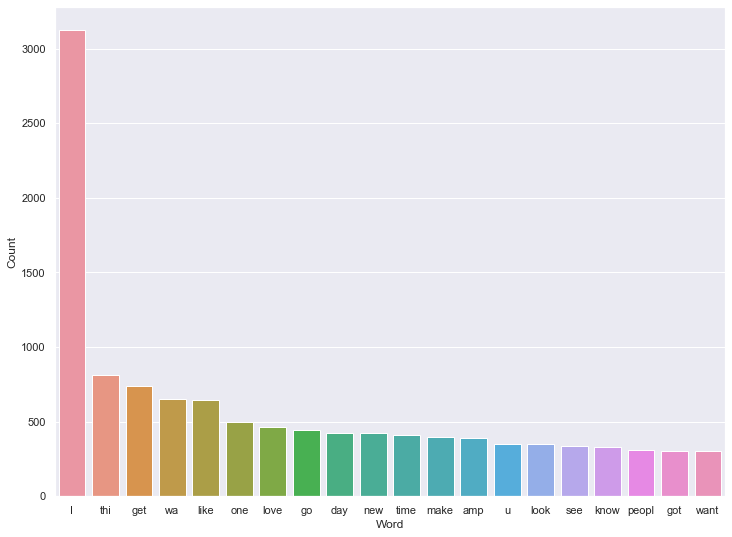

In [109]:
from nltk.probability import FreqDist
all_tweets = tweet['text']

tokenized_tweets = word_tokenize(''.join(all_tweets))

count_words = FreqDist(tokenized_tweets)
counts_df = pd.DataFrame(count_words.items(), columns=['Word', 'Count'])

common_words_with_freq = counts_df[counts_df['Word'].isin(most_common_words)].sort_values(by=['Count'], ascending=False)
top_20_common = common_words_with_freq[:20]

ax = sb.barplot(x="Word", y="Count", data= top_20_common)
top_20_common

# Feature Engeneering

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
cv = CountVectorizer()
cv1 = CountVectorizer()

In [59]:
d = cv.fit_transform(tweet['description'])
words = cv.get_feature_names()

In [60]:
t = cv1.fit_transform(tweet['text'])
words2 = cv1.get_feature_names()

In [61]:
len(words2), len(words)

(25669, 21610)

In [62]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [63]:
tweet['gender_2'] = le.fit_transform(tweet['gender'])
tweet = tweet.drop('gender', axis=1)


# Ensemble Machine Learning Modellimg

## Training the model for ML models

In [89]:
from sklearn.model_selection import train_test_split

X = d
Y = tweet.gender_2

x_train , x_test, y_train, y_test = train_test_split(X, Y, random_state=0)

## Naive Bayes Algorithm

In [90]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()

In [91]:
NB.fit(x_train, y_train)

MultinomialNB()

In [92]:
y_pred = NB.predict(x_test)

In [93]:
from sklearn.metrics import accuracy_score

In [94]:
accuracy_score(y_pred, y_test)

0.6735733695652174

<p> <b> Accuracy of Naive Bayes  = 67.35 </p> </b>

## Random Forest Algorithm

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
rfc = RandomForestClassifier(n_estimators=20)

In [97]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20)

In [98]:
y_pred = rfc.predict(x_test)

In [99]:
accuracy_score(y_pred, y_test)

0.6199048913043478

<p> <b> Accuracy of Random Forest = 61.99 </p> </b>

## Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
log = LogisticRegression()

In [102]:
log.fit(x_train, y_train)

LogisticRegression()

In [103]:
y_pred = log.predict(x_test)

In [104]:
accuracy_score(y_pred, y_test)

0.6514945652173914

<P> <b> Accuracy of Logistic Regression = 65.14 </p> </b>